In [1]:
# -*- coding: utf-8 -*-
from __future__ import print_function
import datetime

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('../data/processed/indiv_1.csv')

In [10]:
df.head()

,acc_x_mean,acc_x_std,acc_x_cv,acc_y_mean,acc_y_std,acc_y_cv,acc_z_mean,acc_z_std,acc_z_cv,state
0,-3.098534,5.898990,-1.903800,-3.443066,6.300170,-1.829814,-2.367178,6.765231,-2.857931,Fly
1,-4.811608,4.060932,-0.843986,-5.178696,3.880405,-0.749302,-3.271646,3.892426,-1.189746,Rest
2,-4.998817,3.770867,-0.754352,-5.247489,3.744354,-0.713552,-3.448705,3.658827,-1.060928,Rest
3,-4.971187,3.815583,-0.767540,-5.245798,3.750559,-0.714965,-3.383294,3.741746,-1.105948,Rest
4,-5.052386,3.730048,-0.738275,-5.324177,3.666363,-0.688625,-3.452652,3.652567,-1.057902,Rest


In [5]:
dfplot = pd.DataFrame()
dfplot['acc_mean'] = df[['acc_x_mean', 'acc_y_mean', 'acc_z_mean']].apply(lambda x: np.mean(x), axis='columns')
dfplot['acc_std'] = df[['acc_x_std', 'acc_y_std', 'acc_z_std']].apply(lambda x: np.mean(x), axis='columns')
dfplot['acc_cv'] = df[['acc_x_cv', 'acc_y_cv', 'acc_z_cv']].apply(lambda x: np.mean(x), axis='columns')
dfplot['state'] = df.state

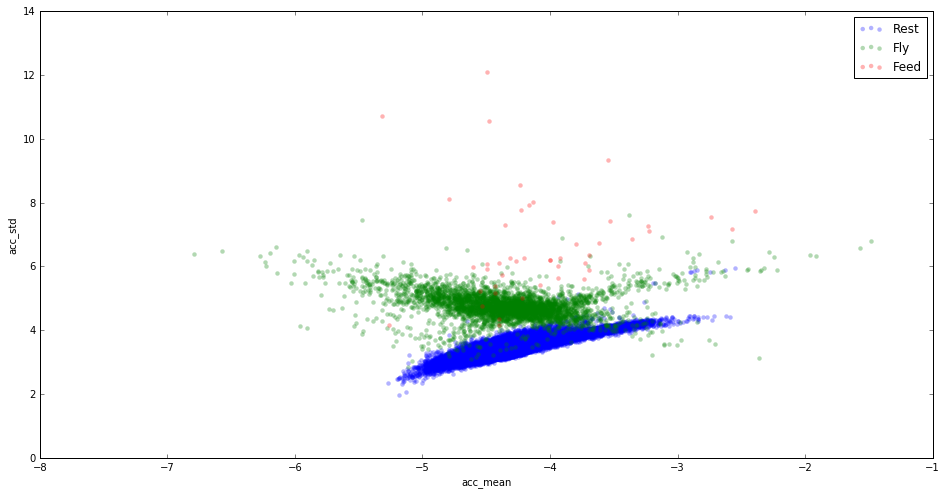

In [6]:
ax = dfplot[dfplot.state=='Rest'].plot(kind='scatter',
                                       x='acc_mean',
                                       y='acc_std',
                                       color='Blue',
                                       lw = 0, # no edge on markers
                                       alpha = 0.3, # for readability
                                       label='Rest',
                                       figsize=(16, 8));

dfplot[dfplot.state=='Fly'].plot(kind='scatter', x='acc_mean', y='acc_std', color='Green', lw=0, alpha=0.3, label='Fly', ax=ax);
dfplot[dfplot.state=='Feed'].plot(kind='scatter', x='acc_mean', y='acc_std', color='Red', lw=0, alpha=0.3, label='Feed', ax=ax);

In [7]:
dfr = df[df.state=='Rest']

In [8]:
dfr.head()

,acc_x_mean,acc_x_std,acc_x_cv,acc_y_mean,acc_y_std,acc_y_cv,acc_z_mean,acc_z_std,acc_z_cv,state
0,-4.842622,3.760037,-0.776446,-5.120616,3.664304,-0.715598,-3.289126,3.688173,-1.121323,Rest
1,-4.739995,3.897430,-0.822243,-5.012914,3.780589,-0.754170,-3.193830,3.827198,-1.198310,Rest
2,-4.705598,3.798199,-0.807166,-4.851644,3.865999,-0.796843,-2.959819,3.904244,-1.319082,Rest
3,-4.278739,4.277498,-0.999710,-4.536434,4.260522,-0.939179,-2.773737,3.995986,-1.440650,Rest
4,-4.386441,4.066364,-0.927030,-4.761423,4.013407,-0.842901,-2.852681,4.023659,-1.410483,Rest


Values should not be always negative -- this indicates a problem in the calibration.

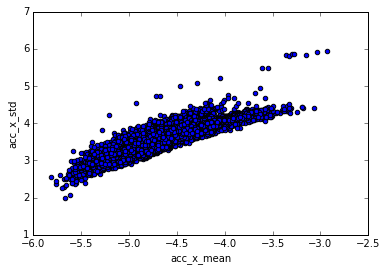

In [10]:
dfr.plot(kind='scatter', x='acc_x_mean', y='acc_x_std');

This shape is abnormal: whichever combination of axes we use, there is a monotonic, sublinear (log-like) relationship between acceleration mean and dispersion (standard deviation).

Let's generate similarly distributed synthetic data to show the difference.

In [29]:
dfr.acc_x_mean.describe()

count    35878.000000
mean        -4.776571
std          0.434362
min         -6.174512
25%         -5.079452
50%         -4.806533
75%         -4.480186
max          0.568957
Name: acc_x_mean, dtype: float64

In [28]:
dfr.acc_x_std.describe()

count    35878.000000
mean         4.083045
std          0.542731
min          1.273333
25%          3.737586
50%          4.103689
75%          4.479493
max          6.720237
Name: acc_x_std, dtype: float64

In [34]:
dat = np.random.uniform(-5, -4, 10000)
dfsynth = pd.DataFrame()
dfsynth['mean'] = dat

In [36]:
dfsynth['values'] = dfsynth['mean'].apply(lambda x: np.random.normal(x, 4.1, 40))

In [37]:
dfsynth['mean_sample'] = dfsynth['values'].apply(lambda x: np.mean(x))
dfsynth['std_sample'] = dfsynth['values'].apply(lambda x: np.std(x))
dfsynth['cv_sample'] = dfsynth['values'].apply(lambda x: np.std(x)/np.mean(x))

In [38]:
dfsynth.head()

,mean,values,mean_sample,std_sample,cv_sample
0,-4.297078,"[-9.02790342093, -5.75895227363, -2.1931704191...",-5.235734,3.510681,-0.670523
1,-4.276501,"[-9.14132216942, 0.766796963263, -1.1587963918...",-4.184557,4.335806,-1.036144
2,-4.512290,"[-5.28970463045, 0.402724723593, -5.6072734317...",-3.144652,4.927462,-1.566934
3,-4.596965,"[-8.14154764212, -4.58574557486, -4.4377853800...",-3.691232,4.523922,-1.225586
4,-4.608478,"[-3.7445264402, -6.33960677963, -12.319182958,...",-3.788959,3.494364,-0.922249


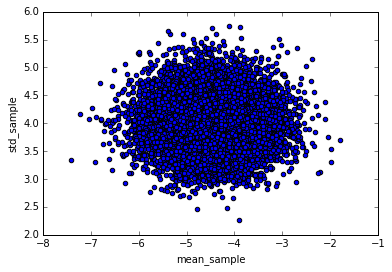

In [40]:
dfsynth.plot(kind='scatter', x='mean_sample', y='std_sample');

Very different indeed!